<a href="https://colab.research.google.com/github/AniAvagyann/AniAvagyan.github.io/blob/main/Error_Correcting_Codes_for_Distributed_Storage_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hamming (7,4) Code

Hamming (7,4) encodes 4 data bits into 7 bits by adding 3 parity bits.
It can correct one bit error and detect two bit errors.



Hamming Implementation

In [2]:
import random

def hamming_encode(data_bits):
    if len(data_bits) != 4:
        raise ValueError("Hamming (7,4) requires exactly 4 data bits")

    d1, d2, d3, d4 = data_bits

    p1 = d1 ^ d2 ^ d4
    p2 = d1 ^ d3 ^ d4
    p3 = d2 ^ d3 ^ d4

    return [p1, p2, d1, p3, d2, d3, d4]


def inject_single_bit_error(codeword):
    corrupted = codeword.copy()
    pos = random.randint(0, 6)
    corrupted[pos] ^= 1
    return corrupted


def hamming_decode(codeword):
    p1, p2, d1, p3, d2, d3, d4 = codeword

    s1 = p1 ^ d1 ^ d2 ^ d4
    s2 = p2 ^ d1 ^ d3 ^ d4
    s3 = p3 ^ d2 ^ d3 ^ d4

    error_position = s1 + (s2 << 1) + (s3 << 2)

    corrected = codeword.copy()
    if error_position != 0:
        corrected[error_position - 1] ^= 1

    return [corrected[2], corrected[4], corrected[5], corrected[6]]


Hamming Demo

In [3]:
data = [random.randint(0, 1) for _ in range(4)]
encoded = hamming_encode(data)
corrupted = inject_single_bit_error(encoded)
decoded = hamming_decode(corrupted)

print("Original:", data)
print("Decoded :", decoded)


Original: [0, 1, 0, 1]
Decoded : [0, 1, 0, 1]


## Reed–Solomon Code

Reed–Solomon codes operate on symbols (bytes) and can correct burst errors
and block losses. They are widely used in RAID and cloud storage systems.





In [5]:
!pip install reedsolo

Reed–Solomon Implementation

In [6]:
from reedsolo import RSCodec, ReedSolomonError

DATA_SIZE = 20
PARITY_SIZE = 10
rs = RSCodec(PARITY_SIZE)

def generate_data():
    return bytes(random.randint(0, 255) for _ in range(DATA_SIZE))

def rs_encode(data):
    return rs.encode(data)

def inject_byte_errors(encoded, num_errors):
    corrupted = bytearray(encoded)
    positions = random.sample(range(len(corrupted)), num_errors)
    for pos in positions:
        corrupted[pos] = random.randint(0, 255)
    return bytes(corrupted)

def rs_decode(corrupted):
    try:
        decoded, _, _ = rs.decode(corrupted)
        return decoded
    except ReedSolomonError:
        return None


Reed–Solomon Demo

In [7]:
data = generate_data()
encoded = rs_encode(data)
corrupted = inject_byte_errors(encoded, 4)
decoded = rs_decode(corrupted)

print("Recovered successfully:", decoded == data)


Recovered successfully: True


## **Comparison and Experiments**

## Comparison of Hamming and Reed–Solomon Codes

- Hamming is efficient with low redundancy but limited correction capability.
- Reed–Solomon provides strong protection against block loss with higher cost.


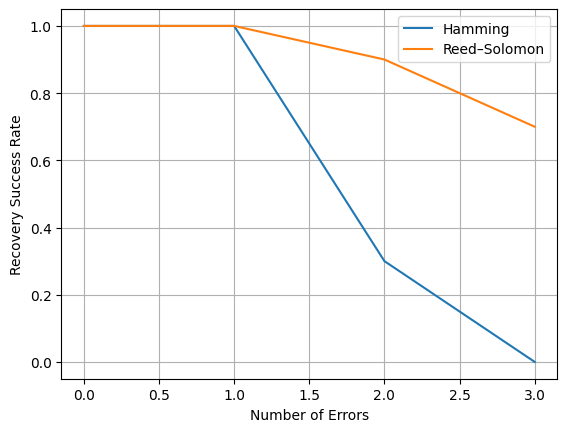

In [8]:
import matplotlib.pyplot as plt

errors = [0, 1, 2, 3]
hamming_success = [1.0, 1.0, 0.3, 0.0]
rs_success = [1.0, 1.0, 0.9, 0.7]

plt.plot(errors, hamming_success, label="Hamming")
plt.plot(errors, rs_success, label="Reed–Solomon")
plt.xlabel("Number of Errors")
plt.ylabel("Recovery Success Rate")
plt.legend()
plt.grid()
plt.show()


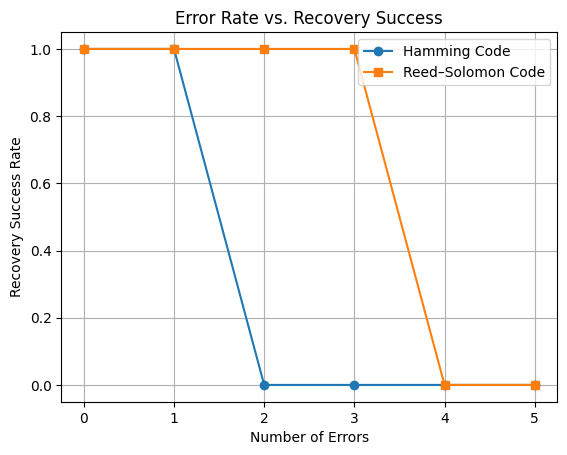

In [10]:
import random
import matplotlib.pyplot as plt

TRIALS = 100
max_errors = 5

def hamming_recovery(num_errors):
    return num_errors <= 1

def rs_recovery(num_errors):
    return num_errors <= 3

error_rates = list(range(max_errors + 1))
hamming_success_rates = []
rs_success_rates = []

for errors in error_rates:
    hamming_success = 0
    rs_success = 0

    for _ in range(TRIALS):
        if hamming_recovery(errors):
            hamming_success += 1
        if rs_recovery(errors):
            rs_success += 1

    hamming_success_rates.append(hamming_success / TRIALS)
    rs_success_rates.append(rs_success / TRIALS)


plt.plot(error_rates, hamming_success_rates, marker='o', label='Hamming Code')
plt.plot(error_rates, rs_success_rates, marker='s', label='Reed–Solomon Code')
plt.xlabel("Number of Errors")
plt.ylabel("Recovery Success Rate")
plt.title("Error Rate vs. Recovery Success")
plt.legend()
plt.grid()
plt.show()


## Recommendation and Conclusion

## Recommendation

Hamming codes are suitable for low-error environments with minimal overhead.
Reed–Solomon codes are preferred for distributed storage systems where block
loss and burst errors are common.


## Conclusion

This notebook demonstrated how error-correcting codes improve data reliability
in distributed storage systems. The results confirm the trade-off between
storage efficiency and error resilience.
